In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()


class KNN:
  def __init__(self, k=3):
    self.k=k
    self.X_train=None
    self.y_train=None

  def fit(self, X, y):
    self.X_train=X
    self.y_train=y

  def _predict_one(self, x):
    distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1))
    k_idx = distances.argsort()[:self.k]
    labels, counts = np.unique(self.y_train[k_idx], return_counts=True)
    return labels[np.argmax(counts)]

  def predict(self, X):
    return np.array([self._predict_one(x) for x in X])

In [5]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

df_features = df.drop("Sleep Disorder", axis=1)
df_features_encoded = pd.get_dummies(df_features)

# Force ALL features to be numeric
df_features_encoded = df_features_encoded.astype(float)

y = df["Sleep Disorder"].astype('category').cat.codes.values
X = df_features_encoded.values

In [6]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, shuffle=True
)

In [7]:
X_min = X_train.min(axis=0)
X_max = X_train.max(axis=0)
denominator = X_max - X_min
denominator[denominator == 0] = 1

X_train_norm = (X_train - X_min) / denominator
X_val_norm   = (X_val   - X_min) / denominator
X_test_norm  = (X_test  - X_min) / denominator


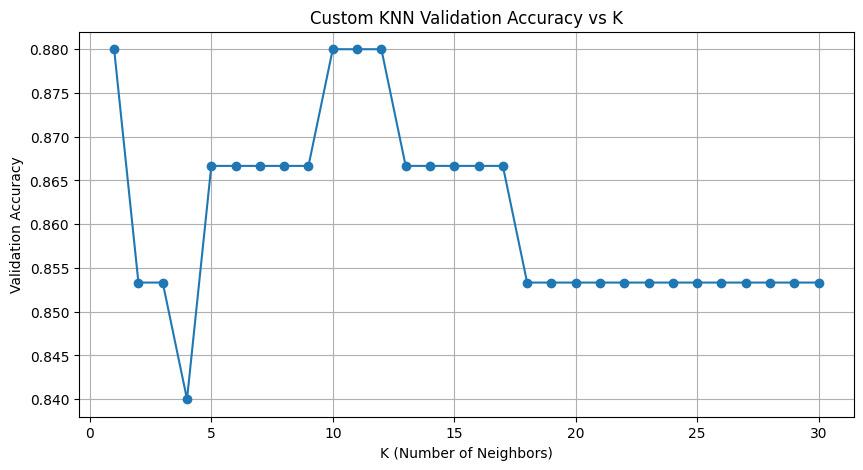

Best K on validation set: 1


In [8]:
k_values = range(1, 31)
val_accuracies = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train_norm, y_train)
    y_val_pred = knn.predict(X_val_norm)
    acc = np.mean(y_val_pred == y_val)
    val_accuracies.append(acc)

# Plot validation accuracy vs K
plt.figure(figsize=(10,5))
plt.plot(k_values, val_accuracies, marker='o')
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Validation Accuracy")
plt.title("Custom KNN Validation Accuracy vs K")
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(val_accuracies)]
print("Best K on validation set:", best_k)

In [9]:
knn_final = KNN(k=best_k)
knn_final.fit(X_train_norm, y_train)
y_test_pred = knn_final.predict(X_test_norm)
test_accuracy = np.mean(y_test_pred == y_test)
print("Test accuracy with best K:", test_accuracy)


Test accuracy with best K: 0.88
